In [9]:
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from allison.clustering.k_means import Kmeans

In [11]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
def numeric_labels(categorical_labels):
    
    labels=list(set(categorical_labels))
    numeric_labels=[]
    
    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return numeric_labels
            

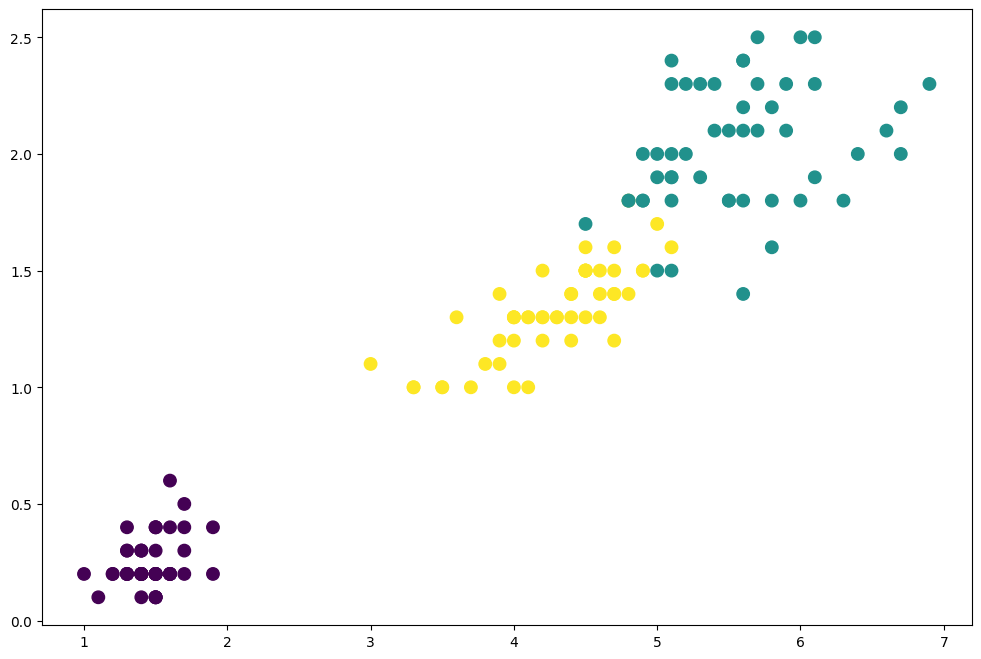

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=numeric_labels(data['Species']))

In [15]:
features=data[['PetalLengthCm','PetalWidthCm']]

In [16]:
model= Kmeans()

In [18]:
hist_train=model.train(features=features, n_centroids=3)

Iter: 1 	 ==================================================> 	 moviment: 1.00
Iter: 2 	 ==================================================> 	 moviment: 0.45
Iter: 3 	 ==================================================> 	 moviment: 0.19
Iter: 4 	 ==================================================> 	 moviment: 0.07


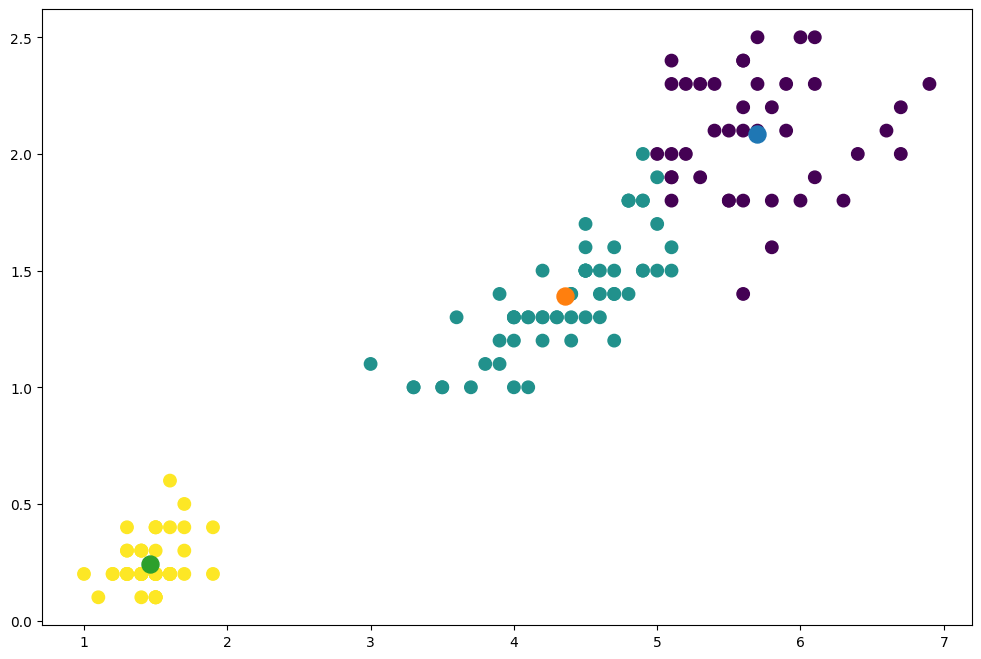

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=model.labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)